In [9]:
import pandas as pd
import glob
import math, statistics
import csv
import re

path_on= r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/on_eng/heroes*.csv"
path_off= r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/off_eng/heroes*.csv"
path_mix= r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/mixed_eng/heroes*.csv"

path_on_sp = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/on_spa/heroes*.csv"
path_off_sp = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/off_spa/heroes*.csv"
path_mix_sp = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/mixed_spa/heroes*.csv"

# dat function returns all the frequency and intensity values for each word for each segment per path

def dat_function(path):
    freq_list = []
    int_list = []

    for fname in glob.glob(path):
        df = pd.read_csv(fname, delimiter='|')
        for index, row in df.iterrows():
            if abs(row.f0_mean) > 0:
                freq_list.append(row.f0_mean)
            if abs(row.i0_mean) > 0:
                int_list.append(row.i0_mean)
            else:
                pass
    return freq_list, int_list


In [71]:
on_res = dat_function(path_on)
off_res = dat_function(path_off)
mix_res = dat_function(path_mix)
on_sp_res = dat_function(path_on_sp)
off_sp_res = dat_function(path_off_sp)
mix_sp_res = dat_function(path_mix_sp)

pairs = [(on_res, on_sp_res), (off_res, off_sp_res), (mix_res, mix_sp_res)]

all_eng = (on_res[0] + off_res[0] + mix_res[0], on_res[1] + off_res[1] + mix_res[1])
all_spa = (on_sp_res[0] + off_sp_res[0] + mix_sp_res[0], on_sp_res[1] + off_sp_res[1] + mix_sp_res[1])

45084

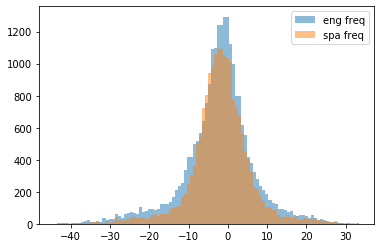

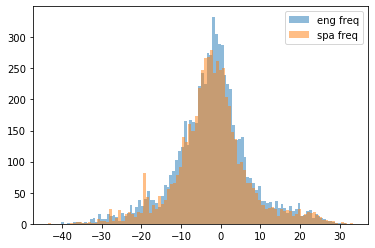

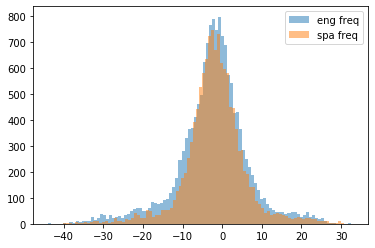

In [88]:
import matplotlib.pyplot as plt

#FREQUENCY values distribution

for pair in pairs:
    plt.figure()
    plt.hist(pair[0][0], 100, alpha=0.5, label='eng freq')
    plt.hist(pair[1][0], 100, alpha=0.5, label='spa freq')
    plt.legend(loc='upper right')



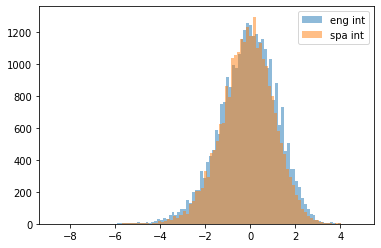

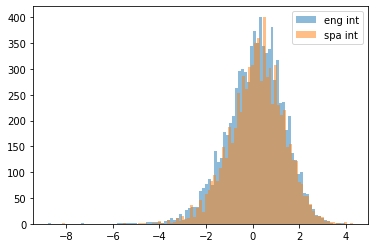

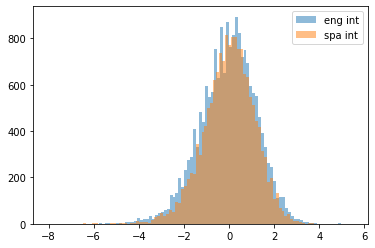

In [89]:
#INTENSITY values distribution

for pair in pairs:
    plt.figure()
    plt.hist(pair[0][1], 100, alpha=0.5, label='eng int')
    plt.hist(pair[1][1], 100, alpha=0.5, label='spa int')
    plt.legend(loc='upper right')


In [79]:
print('FREQ\n')
print('english on ', statistics.stdev(on_res[0]), statistics.stdev(on_res[1]))
print('english off ', statistics.stdev(off_res[0]), statistics.stdev(off_res[1]))
print('english mixed ', statistics.stdev(mix_res[0]), statistics.stdev(mix_res[1]))
print('\nINTENSITY\n')
print('spanish on ', statistics.stdev(on_sp_res[0]), statistics.stdev(on_sp_res[1]))
print('spanish off ', statistics.stdev(off_sp_res[0]), statistics.stdev(off_sp_res[1]))
print('spanish mixed ', statistics.stdev(mix_sp_res[0]), statistics.stdev(mix_sp_res[1]))
print('mean freq ',freq_abs_mean)
print('mean int ',int_abs_mean)

#absolute values
freq_abs_mean = (statistics.mean(on_res[0]) + statistics.mean(off_res[0]) + statistics.mean(mix_res[0]))/3
int_abs_mean = (statistics.mean(on_res[1]) + statistics.mean(off_res[1]) + statistics.mean(mix_res[1]))/3

freq_abs_stdev = statistics.stdev(all_eng[0])
int_abs_stdev = statistics.stdev(all_eng[1])

#screen-dep values
freq_on_mean = statistics.mean(on_res[0])
freq_off_mean = statistics.mean(off_res[0])
freq_mix_mean = statistics.mean(mix_res[0])

freq_on_stdev = statistics.stdev(on_res[0])
freq_off_stdev = statistics.stdev(off_res[0])
freq_mix_stdev = statistics.stdev(mix_res[0])

int_on_mean = statistics.mean(on_res[1])
int_off_mean = statistics.mean(off_res[1])
int_mix_mean = statistics.mean(mix_res[1])

int_on_stdev = statistics.stdev(on_res[1])
int_off_stdev = statistics.stdev(off_res[1])
int_mix_stdev = statistics.stdev(mix_res[1])

FREQ

english on  8.85821993820414 1.263712124324298
english off  9.603564516478704 1.206925483779559
english mixed  8.977168297816956 1.237321688667108

INTENSITY

spanish on  7.736198155872236 1.1587411549034985
spanish off  9.290136948045738 1.1542584215810092
spanish mixed  7.730712013092112 1.1277217029652018
mean freq  -2.282735106842256
mean int  -0.007243342391514418


In [14]:
import pandas as pd
import glob
import math, statistics
import csv
import re

path_on= r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/on_eng/heroes*.csv"
path_on_sp = r"C:/Users/erick/OneDrive/Desktop/MT-FBK-internship/on-off/on_spa/heroes*.csv"

# this func. gets the word, (shortened)id, f0_mean and i0_mean for each word for each segment file in the path
def pre_peak_finder(path):
    final_list = []
    for fname in glob.glob(path):
        temp_l = ()
        t_df = pd.read_csv(fname, delimiter='|')
        for index, row in t_df.iterrows():
            id_i = str(row.id[:13])+str(row.id[24:])
            temp_l = (row.word, id_i, row.f0_mean, row.i0_mean)
            final_list.append(temp_l)
            temp_l = ()
    return final_list

In [81]:
# calling pre_peak_finder func. Use these pairs as input for peak_finder func.

a = pre_peak_finder(path_on)
b = pre_peak_finder(path_on_sp)

m = pre_peak_finder(path_off)
n = pre_peak_finder(path_off_sp)

x =  pre_peak_finder(path_mix)
y =  pre_peak_finder(path_mix_sp)

In [77]:
# this func. returns, for both frequency and intensity, a df with words whose values go beyond/below the threshold (2 stdev)
def peak_finder(eng_f, spa_f):
    my_df_eng = pd.DataFrame({'word': [i[0] for i in eng_f], 'id': [i[1] for i in eng_f], 'frequency': [i[2] for i in eng_f],
                             'intensity': [i[3] for i in eng_f]})
    my_df_spa = pd.DataFrame({'word': [i[0] for i in spa_f], 'id': [i[1] for i in spa_f], 'frequency': [i[2] for i in spa_f],
                             'intensity': [i[3] for i in spa_f]})
    my_df_eng = my_df_eng.dropna()
    my_df_spa = my_df_spa.dropna()
    
    def peaks(df):
        freq_peaks_ = df.loc[df['frequency'] >= freq_abs_mean + 2*freq_abs_stdev]
        freq_peaks_l_ = df.loc[df['frequency'] <= freq_abs_mean - 2*freq_abs_stdev]
        freq_peaks_ = freq_peaks_.append(freq_peaks_l_)

        int_peaks_ = df.loc[df['intensity'] >= int_abs_mean + 2*int_abs_stdev]
        int_peaks_l_ = df.loc[df['intensity'] <= int_abs_mean - 2*int_abs_stdev]
        int_peaks_ = int_peaks_.append(int_peaks_l_)
        
        return freq_peaks_, int_peaks_
    
    eng_proc = peaks(my_df_eng)
    spa_proc = peaks(my_df_spa)

    common_freq_ = set.intersection(set(eng_proc[0].id), set(spa_proc[0].id))
    common_int_ = set.intersection(set(eng_proc[1].id), set(spa_proc[1].id))

    peaks_df_freq = pd.concat([
    eng_proc[0][eng_proc[0].id.isin(common_freq_)],
    spa_proc[0][spa_proc[0].id.isin(common_freq_)]]).sort_values(by='id')
    
    peaks_df_int = pd.concat([
    eng_proc[1][eng_proc[1].id.isin(common_int_)],
    spa_proc[1][spa_proc[1].id.isin(common_int_)]]).sort_values(by='id')
    
    return peaks_df_freq, peaks_df_int

In [90]:
peak_finder(m, n)[0]

,word,id,frequency,intensity
426,no,heroes_s2_11_.segment113.word1,23.8484,1.3902
380,no,heroes_s2_11_.segment113.word1,22.1764,2.6661
322,i,heroes_s2_11_.segment21.word1,25.2376,1.0471
284,creo,heroes_s2_11_.segment21.word1,21.4915,1.8496
298,hola,heroes_s2_11_.segment22.word1,23.2772,0.9394
337,hello,heroes_s2_11_.segment22.word1,-28.3168,0.1644
637,dios,heroes_s2_11_.segment347.word3,23.6074,-0.2200
702,oh,heroes_s2_11_.segment347.word3,19.3666,-0.9583
638,mio,heroes_s2_11_.segment347.word4,23.5460,-0.2200
703,my,heroes_s2_11_.segment347.word4,25.0650,0.4974


In [92]:
# writing csv files with results

peak_finder(a,b)[0].to_csv('frequency_peaks_on.csv', index=False)
peak_finder(a,b)[1].to_csv('intensity_peaks_on.csv', index=False)

peak_finder(m,n)[0].to_csv('frequency_peaks_off.csv', index=False)
peak_finder(m,n)[1].to_csv('intensity_peaks_off.csv', index=False)

peak_finder(x,y)[0].to_csv('frequency_peaks_mixed.csv', index=False)
peak_finder(x,y)[1].to_csv('intensity_peaks_mixed.csv', index=False)

In [ ]:
'''
freq_peaks_eng = my_df_eng.loc[my_df_eng['frequency'] >= freq_on_mean + freq_on_stdev]
freq_peaks_l_eng = my_df_eng.loc[my_df_eng['frequency'] <= freq_on_mean - freq_on_stdev]
freq_peaks_eng = freq_peaks_eng.append(freq_peaks_l_eng)

freq_peaks_spa = my_df_spa.loc[my_df_spa['frequency'] >= freq_on_mean + freq_on_stdev]
freq_peaks_l_spa = my_df_spa.loc[my_df_spa['frequency'] <= freq_on_mean - freq_on_stdev]
freq_peaks_spa = freq_peaks_spa.append(freq_peaks_l_spa)
'''